### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

###############################################################################################################

img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

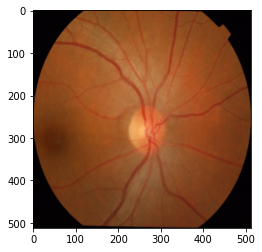

(50, 512, 512, 3)


(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

In [3]:
plt.imshow(img_train[45])
plt.show()
print(img_train.shape)
img_train, cup_train, disc_train, disc_locations

### Train images

In [4]:
hue_channel_train = convert_to_hsv(0, img_train)
len(hue_channel_train)

50

### Test images

In [5]:
hue_channel_test = convert_to_hsv(0, img_test)
len(hue_channel_test)

51

#### Generator of augmented data:

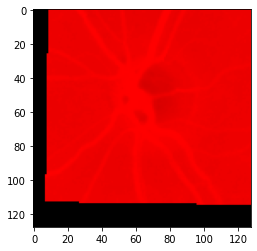

In [6]:
gen = data_generator(hue_channel_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

plt.imshow(batch[0][0])

51
51


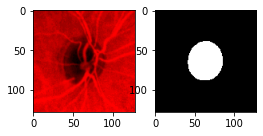

In [7]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(hue_channel_test, cup_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))
print(len(X_test)) 
print(len(Y_test))

#-----------------------
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and test cup

In [8]:
epochs = NUM_EPOCHS
spe = SPE

model = create_compile_model(img_size)
history_cup = train(hue_channel_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_hue', 
                    model, 
                    epochs, X_test, Y_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 24s 224ms/step - loss: 1.5415 - mean_IOU_gpu: 0.0399 - dice_metric: 0.0753 - val_loss: 1.4676 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/500
99/99 [==============================] - 29s 292ms/step - loss: 1.5067 - mean_IOU_gpu: 1.0551e-04 - dice_metric: 2.1070e-04 - val_loss: 1.4352 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 32s 322ms/step - loss: 1.5224 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_loss: 1.4002 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 32s 328ms/step - loss: 1.4685 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_loss: 1.3670 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 5/500
99/99 [==============================] - 32s 328ms/step - loss: 1.4316 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_lo

Epoch 81/500
99/99 [==============================] - 32s 323ms/step - loss: 0.3115 - mean_IOU_gpu: 0.5694 - dice_metric: 0.7138 - val_loss: 0.3809 - val_mean_IOU_gpu: 0.5196 - val_dice_metric: 0.6351
Epoch 82/500
99/99 [==============================] - 32s 326ms/step - loss: 0.3077 - mean_IOU_gpu: 0.5549 - dice_metric: 0.6999 - val_loss: 0.4286 - val_mean_IOU_gpu: 0.3817 - val_dice_metric: 0.4957
Epoch 83/500
99/99 [==============================] - 32s 327ms/step - loss: 0.2779 - mean_IOU_gpu: 0.5736 - dice_metric: 0.7177 - val_loss: 0.3308 - val_mean_IOU_gpu: 0.5816 - val_dice_metric: 0.6912
Epoch 84/500
99/99 [==============================] - 32s 326ms/step - loss: 0.2801 - mean_IOU_gpu: 0.5782 - dice_metric: 0.7221 - val_loss: 0.3440 - val_mean_IOU_gpu: 0.5665 - val_dice_metric: 0.6776
Epoch 85/500
99/99 [==============================] - 32s 326ms/step - loss: 0.2763 - mean_IOU_gpu: 0.5672 - dice_metric: 0.7150 - val_loss: 0.4410 - val_mean_IOU_gpu: 0.4415 - val_dice_metric: 0.

Epoch 122/500
99/99 [==============================] - 32s 327ms/step - loss: 0.2566 - mean_IOU_gpu: 0.6049 - dice_metric: 0.7404 - val_loss: 0.4535 - val_mean_IOU_gpu: 0.4682 - val_dice_metric: 0.5794
Epoch 123/500
99/99 [==============================] - 32s 324ms/step - loss: 0.3973 - mean_IOU_gpu: 0.5000 - dice_metric: 0.6494 - val_loss: 0.3420 - val_mean_IOU_gpu: 0.6180 - val_dice_metric: 0.7365
Epoch 124/500
99/99 [==============================] - 32s 327ms/step - loss: 0.2986 - mean_IOU_gpu: 0.5506 - dice_metric: 0.7005 - val_loss: 0.3139 - val_mean_IOU_gpu: 0.6106 - val_dice_metric: 0.7148
Epoch 125/500
99/99 [==============================] - 32s 327ms/step - loss: 0.2886 - mean_IOU_gpu: 0.5560 - dice_metric: 0.7039 - val_loss: 0.3365 - val_mean_IOU_gpu: 0.5984 - val_dice_metric: 0.7044
Epoch 126/500
99/99 [==============================] - 32s 322ms/step - loss: 0.2699 - mean_IOU_gpu: 0.5826 - dice_metric: 0.7237 - val_loss: 0.3256 - val_mean_IOU_gpu: 0.5849 - val_dice_metri

Epoch 203/500
99/99 [==============================] - 32s 326ms/step - loss: 0.2647 - mean_IOU_gpu: 0.5850 - dice_metric: 0.7270 - val_loss: 0.3937 - val_mean_IOU_gpu: 0.4745 - val_dice_metric: 0.6229
Epoch 204/500
99/99 [==============================] - 33s 329ms/step - loss: 0.2516 - mean_IOU_gpu: 0.5892 - dice_metric: 0.7326 - val_loss: 0.3531 - val_mean_IOU_gpu: 0.5228 - val_dice_metric: 0.6642
Epoch 205/500
99/99 [==============================] - 33s 330ms/step - loss: 0.2587 - mean_IOU_gpu: 0.5899 - dice_metric: 0.7317 - val_loss: 0.3531 - val_mean_IOU_gpu: 0.5193 - val_dice_metric: 0.6595
Epoch 206/500
99/99 [==============================] - 33s 329ms/step - loss: 0.2526 - mean_IOU_gpu: 0.5993 - dice_metric: 0.7382 - val_loss: 0.3860 - val_mean_IOU_gpu: 0.4806 - val_dice_metric: 0.6246
Epoch 207/500
99/99 [==============================] - 32s 325ms/step - loss: 0.2373 - mean_IOU_gpu: 0.6078 - dice_metric: 0.7473 - val_loss: 0.4387 - val_mean_IOU_gpu: 0.4379 - val_dice_metri

Epoch 284/500
99/99 [==============================] - 32s 326ms/step - loss: 0.2122 - mean_IOU_gpu: 0.6359 - dice_metric: 0.7684 - val_loss: 0.3636 - val_mean_IOU_gpu: 0.4826 - val_dice_metric: 0.6252
Epoch 285/500
99/99 [==============================] - 32s 323ms/step - loss: 0.2255 - mean_IOU_gpu: 0.6233 - dice_metric: 0.7577 - val_loss: 0.4317 - val_mean_IOU_gpu: 0.4303 - val_dice_metric: 0.5786
Epoch 286/500
99/99 [==============================] - 32s 326ms/step - loss: 0.2337 - mean_IOU_gpu: 0.6115 - dice_metric: 0.7500 - val_loss: 0.3347 - val_mean_IOU_gpu: 0.5166 - val_dice_metric: 0.6555
Epoch 287/500
99/99 [==============================] - 32s 321ms/step - loss: 0.2452 - mean_IOU_gpu: 0.5942 - dice_metric: 0.7377 - val_loss: 0.3528 - val_mean_IOU_gpu: 0.4992 - val_dice_metric: 0.6401
Epoch 288/500
99/99 [==============================] - 32s 327ms/step - loss: 0.2199 - mean_IOU_gpu: 0.6299 - dice_metric: 0.7636 - val_loss: 0.3493 - val_mean_IOU_gpu: 0.5023 - val_dice_metri

Epoch 365/500
99/99 [==============================] - 32s 320ms/step - loss: 0.2257 - mean_IOU_gpu: 0.6215 - dice_metric: 0.7570 - val_loss: 0.3600 - val_mean_IOU_gpu: 0.4936 - val_dice_metric: 0.6357
Epoch 366/500
99/99 [==============================] - 32s 318ms/step - loss: 0.2044 - mean_IOU_gpu: 0.6413 - dice_metric: 0.7737 - val_loss: 0.2993 - val_mean_IOU_gpu: 0.5447 - val_dice_metric: 0.6799
Epoch 367/500
99/99 [==============================] - 32s 321ms/step - loss: 0.2083 - mean_IOU_gpu: 0.6345 - dice_metric: 0.7682 - val_loss: 0.3484 - val_mean_IOU_gpu: 0.4931 - val_dice_metric: 0.6365
Epoch 368/500
99/99 [==============================] - 31s 315ms/step - loss: 0.2299 - mean_IOU_gpu: 0.6296 - dice_metric: 0.7598 - val_loss: 0.3282 - val_mean_IOU_gpu: 0.5152 - val_dice_metric: 0.6559
Epoch 369/500
99/99 [==============================] - 31s 318ms/step - loss: 0.2156 - mean_IOU_gpu: 0.6400 - dice_metric: 0.7700 - val_loss: 0.3094 - val_mean_IOU_gpu: 0.5335 - val_dice_metri

Epoch 446/500
99/99 [==============================] - 32s 319ms/step - loss: 0.2105 - mean_IOU_gpu: 0.6423 - dice_metric: 0.7722 - val_loss: 0.3567 - val_mean_IOU_gpu: 0.5035 - val_dice_metric: 0.6435
Epoch 447/500
99/99 [==============================] - 32s 320ms/step - loss: 0.2029 - mean_IOU_gpu: 0.6504 - dice_metric: 0.7786 - val_loss: 0.4090 - val_mean_IOU_gpu: 0.4599 - val_dice_metric: 0.6048
Epoch 448/500
99/99 [==============================] - 31s 317ms/step - loss: 0.2132 - mean_IOU_gpu: 0.6355 - dice_metric: 0.7678 - val_loss: 0.3910 - val_mean_IOU_gpu: 0.4746 - val_dice_metric: 0.6185
Epoch 449/500
99/99 [==============================] - 32s 323ms/step - loss: 0.2059 - mean_IOU_gpu: 0.6434 - dice_metric: 0.7748 - val_loss: 0.3143 - val_mean_IOU_gpu: 0.5419 - val_dice_metric: 0.6772
Epoch 450/500
99/99 [==============================] - 31s 318ms/step - loss: 0.2016 - mean_IOU_gpu: 0.6456 - dice_metric: 0.7761 - val_loss: 0.3517 - val_mean_IOU_gpu: 0.5056 - val_dice_metri

### Visual check

image #0


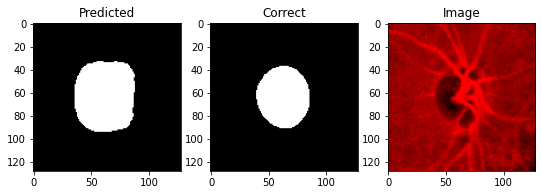

IOU: 0.7011908888816833
Dice: 0.8243529910903691
image #1


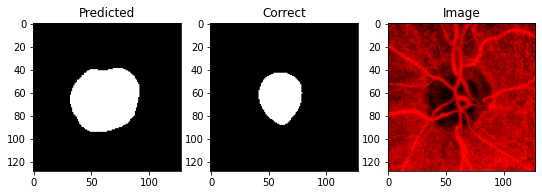

IOU: 0.4839683175086975
Dice: 0.6522623284189121
image #2


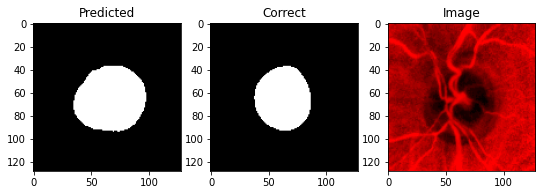

IOU: 0.7509741187095642
Dice: 0.8577786769168522
image #3


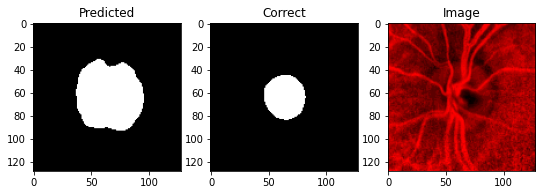

IOU: 0.376912385225296
Dice: 0.5474747474747474
image #4


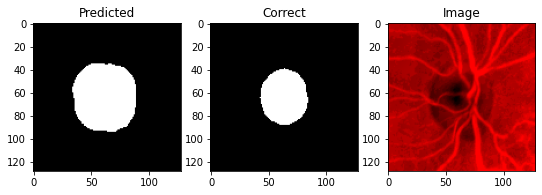

IOU: 0.5765098333358765
Dice: 0.7313748531139835
image #5


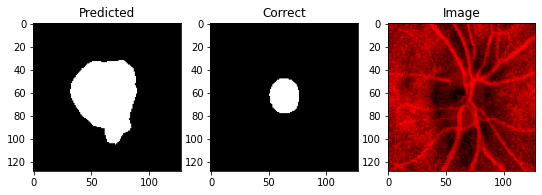

IOU: 0.21472814679145813
Dice: 0.35354107648725214
image #6


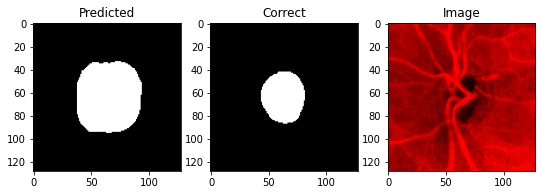

IOU: 0.45057162642478943
Dice: 0.6212331942512749
image #7


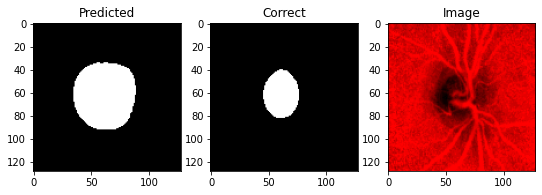

IOU: 0.3890400230884552
Dice: 0.5601566871852266
image #8


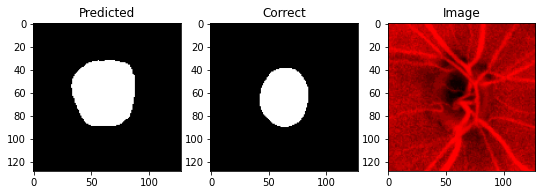

IOU: 0.6479142904281616
Dice: 0.7863446353924756
image #9


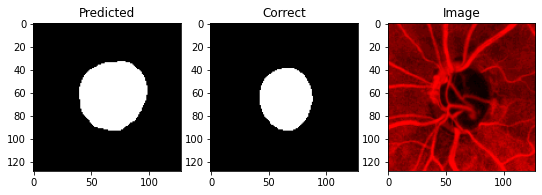

IOU: 0.6929416060447693
Dice: 0.8186243386243386
image #10


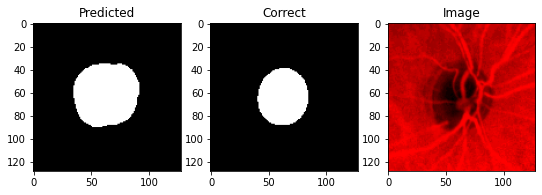

IOU: 0.668615996837616
Dice: 0.8014018691588785
image #11


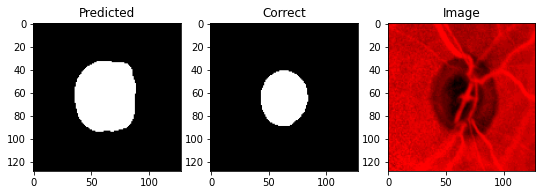

IOU: 0.5604515671730042
Dice: 0.7183197199533256
image #12


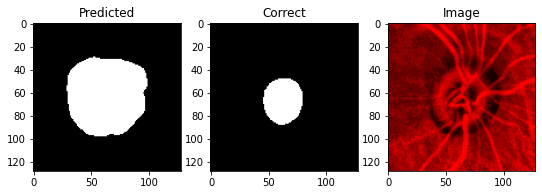

IOU: 0.2780762314796448
Dice: 0.43514811849479584
image #13


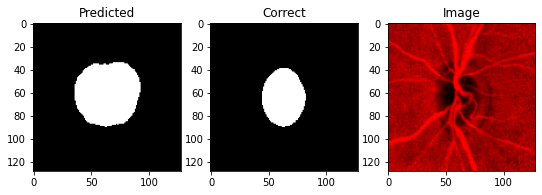

IOU: 0.5717628598213196
Dice: 0.7275434243176179
image #14


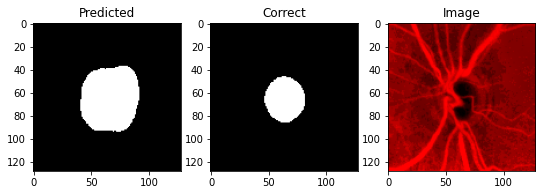

IOU: 0.44241923093795776
Dice: 0.6134405514072372
image #15


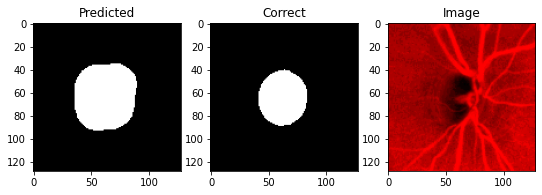

IOU: 0.6035592555999756
Dice: 0.7527744982290436
image #16


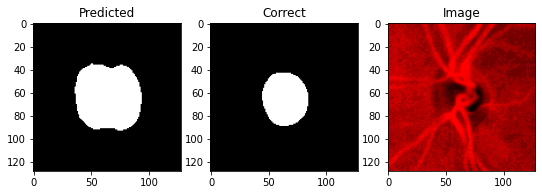

IOU: 0.5283968448638916
Dice: 0.691439322671684
image #17


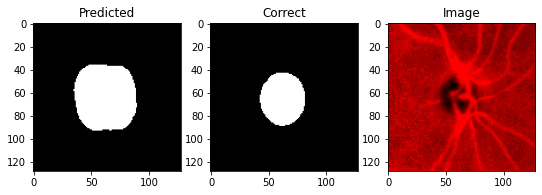

IOU: 0.5356871485710144
Dice: 0.6976514215080346
image #18


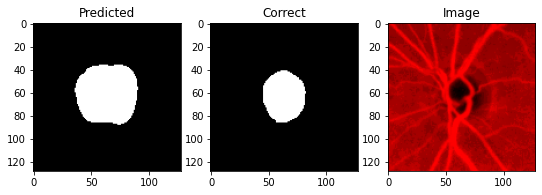

IOU: 0.5526540875434875
Dice: 0.7118830989798731
image #19


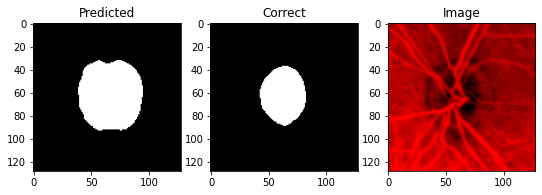

IOU: 0.5512090921401978
Dice: 0.7106831728564879
image #20


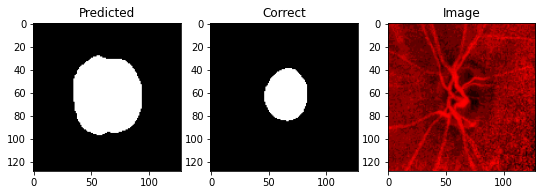

IOU: 0.3965621292591095
Dice: 0.5679118980781689
image #21


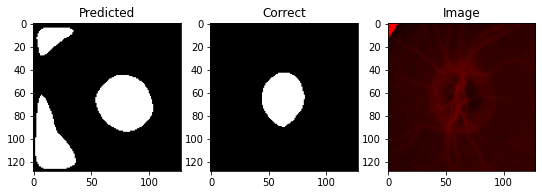

IOU: 0.19582310318946838
Dice: 0.3275118142592973
image #22


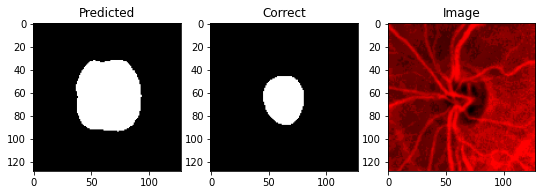

IOU: 0.39986467361450195
Dice: 0.5712904784920251
image #23


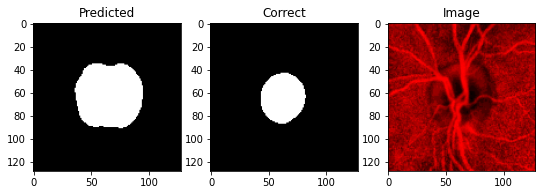

IOU: 0.48014572262763977
Dice: 0.6487816884075807
image #24


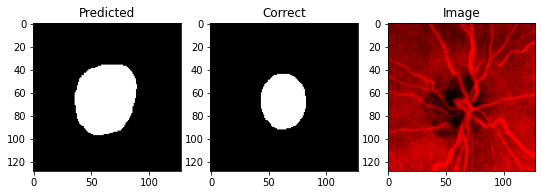

IOU: 0.5649546980857849
Dice: 0.722007722007722
image #25


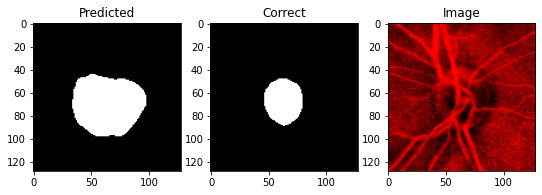

IOU: 0.3919019401073456
Dice: 0.5631171603949826
image #26


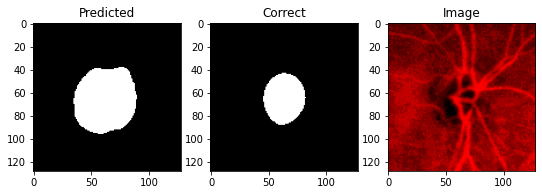

IOU: 0.4909018874168396
Dice: 0.6585301140886177
image #27


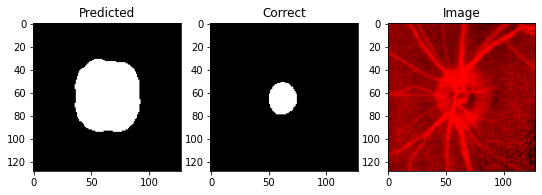

IOU: 0.176958829164505
Dice: 0.3007052186177715
image #28


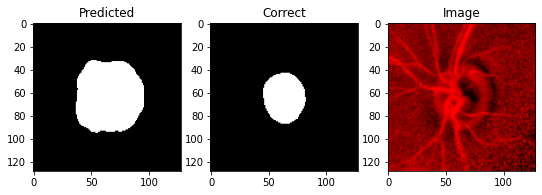

IOU: 0.40618956089019775
Dice: 0.5777166437414031
image #29


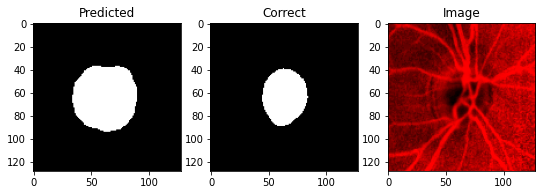

IOU: 0.5722565650939941
Dice: 0.7279429835340379
image #30


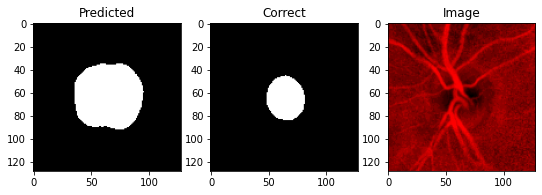

IOU: 0.35501065850257874
Dice: 0.5239968528717546
image #31


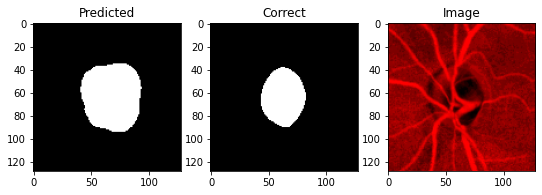

IOU: 0.5917322635650635
Dice: 0.7435072965619589
image #32


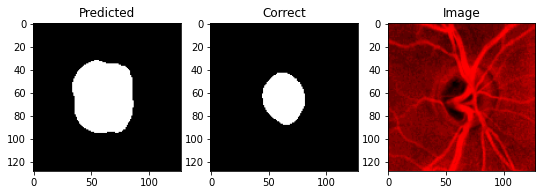

IOU: 0.44759511947631836
Dice: 0.61839821472849
image #33


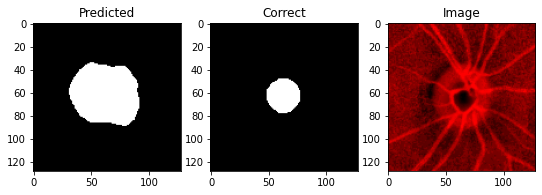

IOU: 0.260373055934906
Dice: 0.41316822712171547
image #34


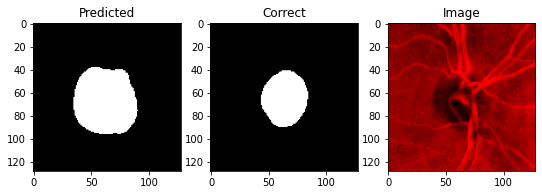

IOU: 0.5727272629737854
Dice: 0.7283236994219653
image #35


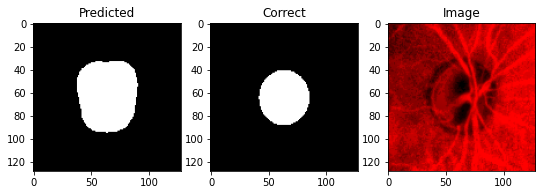

IOU: 0.5966324806213379
Dice: 0.7473635946813388
image #36


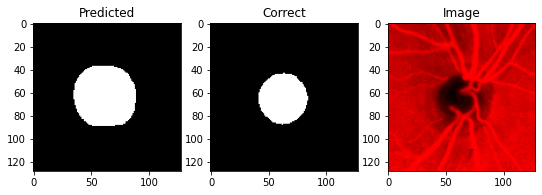

IOU: 0.6158743500709534
Dice: 0.7622800105069608
image #37


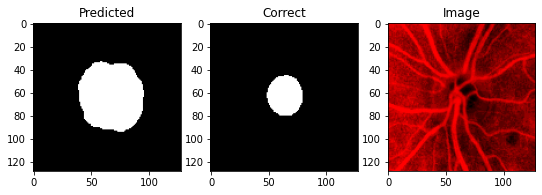

IOU: 0.3085838556289673
Dice: 0.4716302241904235
image #38


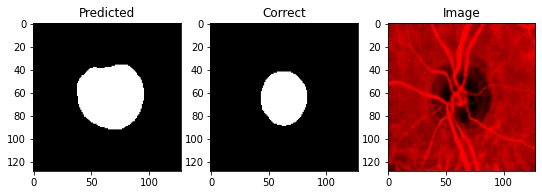

IOU: 0.5691775679588318
Dice: 0.7254469752632868
image #39


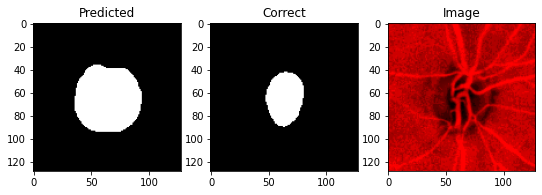

IOU: 0.4307020604610443
Dice: 0.6020849224510552
image #40


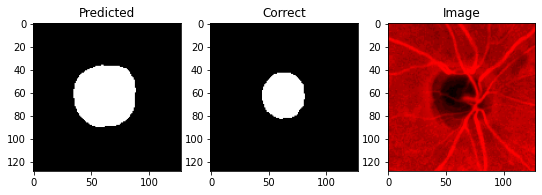

IOU: 0.49513742327690125
Dice: 0.6623303167420814
image #41


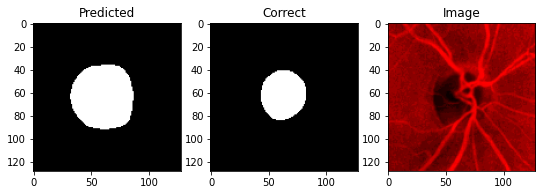

IOU: 0.5318381786346436
Dice: 0.6943790849673203
image #42


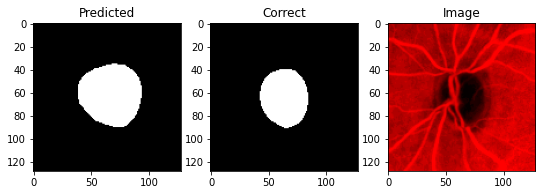

IOU: 0.6846733689308167
Dice: 0.8128262490678598
image #43


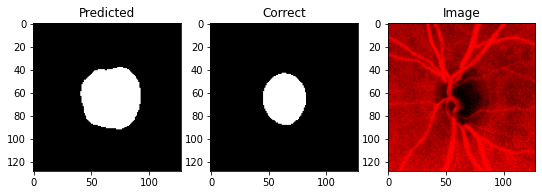

IOU: 0.5731382966041565
Dice: 0.7286559594251902
image #44


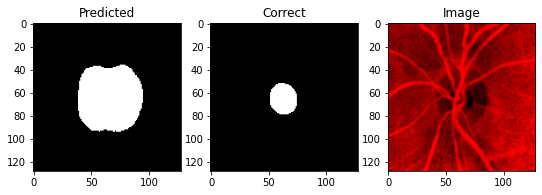

IOU: 0.18622449040412903
Dice: 0.3139784946236559
image #45


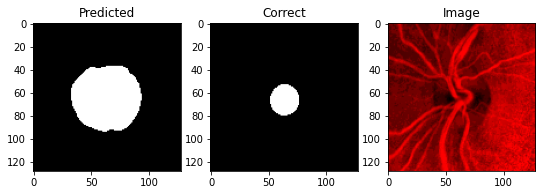

IOU: 0.1921413093805313
Dice: 0.32234653764741455
image #46


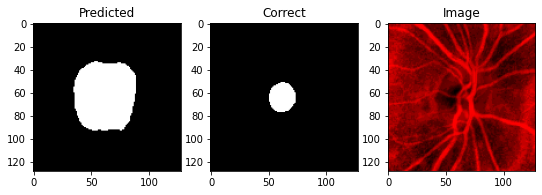

IOU: 0.17154352366924286
Dice: 0.2928504527005932
image #47


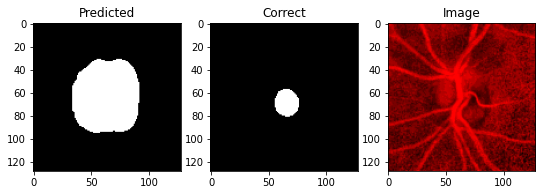

IOU: 0.1257523000240326
Dice: 0.22341024198086662
image #48


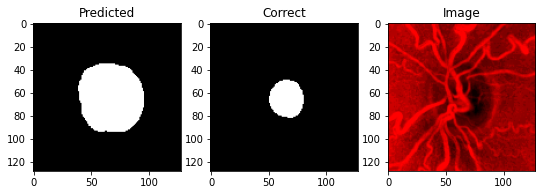

IOU: 0.27927929162979126
Dice: 0.43661971830985913
image #49


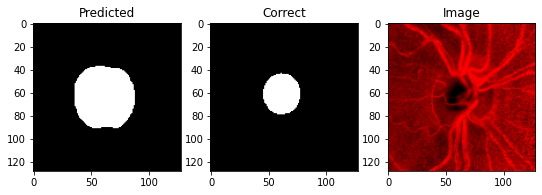

IOU: 0.38239046931266785
Dice: 0.5532307692307692
image #50


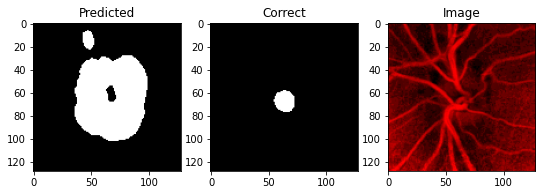

IOU: 0.052204765379428864
Dice: 0.09922928709055877


In [9]:
pred_iou, pred_dice, pred_cup = predict(hue_channel_test, X_test, Y_test, model, img_size)

In [10]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.45246813
0.603039246622336


### Training and Test disc

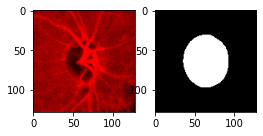

In [11]:
X_test, Z_test = next(data_generator(hue_channel_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

num = 1
for i in range(num):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()
    print('=========================')

In [12]:
model_disc = create_compile_model(img_size)

history_disc = train(hue_channel_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_hue', 
                     model_disc, epochs, X_test, Z_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 28s 282ms/step - loss: 0.1284 - mean_IOU_gpu: 0.7448 - dice_metric: 0.8479 - val_loss: 0.3817 - val_mean_IOU_gpu: 0.4773 - val_dice_metric: 0.6399
Epoch 2/500
99/99 [==============================] - 18s 181ms/step - loss: 0.0964 - mean_IOU_gpu: 0.7933 - dice_metric: 0.8824 - val_loss: 0.3744 - val_mean_IOU_gpu: 0.4810 - val_dice_metric: 0.6432
Epoch 3/500
99/99 [==============================] - 27s 278ms/step - loss: 0.1008 - mean_IOU_gpu: 0.7837 - dice_metric: 0.8763 - val_loss: 0.3685 - val_mean_IOU_gpu: 0.4874 - val_dice_metric: 0.6490
Epoch 4/500
99/99 [==============================] - 31s 316ms/step - loss: 0.0898 - mean_IOU_gpu: 0.8030 - dice_metric: 0.8887 - val_loss: 0.3969 - val_mean_IOU_gpu: 0.4618 - val_dice_metric: 0.6253
Epoch 5/500
99/99 [==============================] - 31s 318ms/step - loss: 0.0905 - mean_IOU_gpu: 0.8028 - dice_metric: 0.8886 - val_loss: 0.3501 - val_mean_IOU_gpu: 0.5016 - val_dice_metric: 0.6616


Epoch 42/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0897 - mean_IOU_gpu: 0.8036 - dice_metric: 0.8890 - val_loss: 0.3358 - val_mean_IOU_gpu: 0.5187 - val_dice_metric: 0.6731
Epoch 43/500
99/99 [==============================] - 31s 318ms/step - loss: 0.0795 - mean_IOU_gpu: 0.8220 - dice_metric: 0.9009 - val_loss: 0.3188 - val_mean_IOU_gpu: 0.5314 - val_dice_metric: 0.6833
Epoch 44/500
99/99 [==============================] - 32s 321ms/step - loss: 0.0843 - mean_IOU_gpu: 0.8137 - dice_metric: 0.8953 - val_loss: 0.3157 - val_mean_IOU_gpu: 0.5342 - val_dice_metric: 0.6856
Epoch 45/500
99/99 [==============================] - 31s 318ms/step - loss: 0.0896 - mean_IOU_gpu: 0.8045 - dice_metric: 0.8896 - val_loss: 0.3166 - val_mean_IOU_gpu: 0.5344 - val_dice_metric: 0.6861
Epoch 46/500
99/99 [==============================] - 32s 319ms/step - loss: 0.0875 - mean_IOU_gpu: 0.8083 - dice_metric: 0.8920 - val_loss: 0.3010 - val_mean_IOU_gpu: 0.5476 - val_dice_metric: 0.

Epoch 83/500
99/99 [==============================] - 32s 324ms/step - loss: 0.0772 - mean_IOU_gpu: 0.8267 - dice_metric: 0.9037 - val_loss: 0.2862 - val_mean_IOU_gpu: 0.5577 - val_dice_metric: 0.7054
Epoch 84/500
99/99 [==============================] - 32s 318ms/step - loss: 0.0821 - mean_IOU_gpu: 0.8180 - dice_metric: 0.8980 - val_loss: 0.2840 - val_mean_IOU_gpu: 0.5591 - val_dice_metric: 0.7065
Epoch 85/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0826 - mean_IOU_gpu: 0.8199 - dice_metric: 0.8989 - val_loss: 0.2847 - val_mean_IOU_gpu: 0.5591 - val_dice_metric: 0.7064
Epoch 86/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0774 - mean_IOU_gpu: 0.8266 - dice_metric: 0.9034 - val_loss: 0.2867 - val_mean_IOU_gpu: 0.5581 - val_dice_metric: 0.7050
Epoch 87/500
99/99 [==============================] - 32s 319ms/step - loss: 0.0855 - mean_IOU_gpu: 0.8112 - dice_metric: 0.8937 - val_loss: 0.3229 - val_mean_IOU_gpu: 0.5264 - val_dice_metric: 0.

Epoch 124/500
99/99 [==============================] - 31s 318ms/step - loss: 0.0799 - mean_IOU_gpu: 0.8216 - dice_metric: 0.9004 - val_loss: 0.2762 - val_mean_IOU_gpu: 0.5657 - val_dice_metric: 0.7120
Epoch 125/500
99/99 [==============================] - 32s 319ms/step - loss: 0.0783 - mean_IOU_gpu: 0.8232 - dice_metric: 0.9015 - val_loss: 0.2754 - val_mean_IOU_gpu: 0.5672 - val_dice_metric: 0.7127
Epoch 126/500
99/99 [==============================] - 31s 317ms/step - loss: 0.0796 - mean_IOU_gpu: 0.8236 - dice_metric: 0.9015 - val_loss: 0.2683 - val_mean_IOU_gpu: 0.5738 - val_dice_metric: 0.7178
Epoch 127/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0785 - mean_IOU_gpu: 0.8246 - dice_metric: 0.9021 - val_loss: 0.2990 - val_mean_IOU_gpu: 0.5453 - val_dice_metric: 0.6951
Epoch 128/500
99/99 [==============================] - 32s 321ms/step - loss: 0.0852 - mean_IOU_gpu: 0.8146 - dice_metric: 0.8955 - val_loss: 0.2982 - val_mean_IOU_gpu: 0.5446 - val_dice_metri

Epoch 205/500
99/99 [==============================] - 31s 316ms/step - loss: 0.0806 - mean_IOU_gpu: 0.8231 - dice_metric: 0.9007 - val_loss: 0.2665 - val_mean_IOU_gpu: 0.5790 - val_dice_metric: 0.7219
Epoch 206/500
99/99 [==============================] - 32s 319ms/step - loss: 0.0833 - mean_IOU_gpu: 0.8168 - dice_metric: 0.8971 - val_loss: 0.2403 - val_mean_IOU_gpu: 0.6078 - val_dice_metric: 0.7431
Epoch 207/500
99/99 [==============================] - 32s 317ms/step - loss: 0.0765 - mean_IOU_gpu: 0.8258 - dice_metric: 0.9030 - val_loss: 0.2630 - val_mean_IOU_gpu: 0.5803 - val_dice_metric: 0.7235
Epoch 208/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0823 - mean_IOU_gpu: 0.8174 - dice_metric: 0.8978 - val_loss: 0.2552 - val_mean_IOU_gpu: 0.5907 - val_dice_metric: 0.7306
Epoch 209/500
99/99 [==============================] - 31s 312ms/step - loss: 0.0796 - mean_IOU_gpu: 0.8237 - dice_metric: 0.9013 - val_loss: 0.2786 - val_mean_IOU_gpu: 0.5666 - val_dice_metri

Epoch 286/500
99/99 [==============================] - 32s 319ms/step - loss: 0.0781 - mean_IOU_gpu: 0.8235 - dice_metric: 0.9015 - val_loss: 0.2208 - val_mean_IOU_gpu: 0.6324 - val_dice_metric: 0.7615
Epoch 287/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0801 - mean_IOU_gpu: 0.8217 - dice_metric: 0.9002 - val_loss: 0.2400 - val_mean_IOU_gpu: 0.6075 - val_dice_metric: 0.7441
Epoch 288/500
99/99 [==============================] - 31s 317ms/step - loss: 0.0782 - mean_IOU_gpu: 0.8254 - dice_metric: 0.9026 - val_loss: 0.2311 - val_mean_IOU_gpu: 0.6200 - val_dice_metric: 0.7526
Epoch 289/500
99/99 [==============================] - 32s 322ms/step - loss: 0.0794 - mean_IOU_gpu: 0.8225 - dice_metric: 0.9007 - val_loss: 0.2471 - val_mean_IOU_gpu: 0.6011 - val_dice_metric: 0.7386
Epoch 290/500
99/99 [==============================] - 32s 325ms/step - loss: 0.0834 - mean_IOU_gpu: 0.8141 - dice_metric: 0.8959 - val_loss: 0.2162 - val_mean_IOU_gpu: 0.6361 - val_dice_metri

Epoch 367/500
99/99 [==============================] - 32s 319ms/step - loss: 0.0779 - mean_IOU_gpu: 0.8250 - dice_metric: 0.9025 - val_loss: 0.2082 - val_mean_IOU_gpu: 0.6459 - val_dice_metric: 0.7734
Epoch 368/500
99/99 [==============================] - 32s 319ms/step - loss: 0.0767 - mean_IOU_gpu: 0.8285 - dice_metric: 0.9045 - val_loss: 0.2154 - val_mean_IOU_gpu: 0.6363 - val_dice_metric: 0.7675
Epoch 369/500
99/99 [==============================] - 32s 321ms/step - loss: 0.0806 - mean_IOU_gpu: 0.8226 - dice_metric: 0.9005 - val_loss: 0.2180 - val_mean_IOU_gpu: 0.6347 - val_dice_metric: 0.7652
Epoch 370/500
99/99 [==============================] - 32s 322ms/step - loss: 0.0809 - mean_IOU_gpu: 0.8195 - dice_metric: 0.8988 - val_loss: 0.2378 - val_mean_IOU_gpu: 0.6124 - val_dice_metric: 0.7491
Epoch 371/500
99/99 [==============================] - 32s 320ms/step - loss: 0.0783 - mean_IOU_gpu: 0.8240 - dice_metric: 0.9020 - val_loss: 0.2238 - val_mean_IOU_gpu: 0.6284 - val_dice_metri

Epoch 448/500
99/99 [==============================] - 32s 322ms/step - loss: 0.0714 - mean_IOU_gpu: 0.8355 - dice_metric: 0.9090 - val_loss: 0.2139 - val_mean_IOU_gpu: 0.6434 - val_dice_metric: 0.7712
Epoch 449/500
99/99 [==============================] - 32s 319ms/step - loss: 0.0860 - mean_IOU_gpu: 0.8099 - dice_metric: 0.8931 - val_loss: 0.2215 - val_mean_IOU_gpu: 0.6337 - val_dice_metric: 0.7643
Epoch 450/500
99/99 [==============================] - 31s 317ms/step - loss: 0.0765 - mean_IOU_gpu: 0.8289 - dice_metric: 0.9046 - val_loss: 0.2516 - val_mean_IOU_gpu: 0.5987 - val_dice_metric: 0.7393
Epoch 451/500
99/99 [==============================] - 31s 318ms/step - loss: 0.0767 - mean_IOU_gpu: 0.8286 - dice_metric: 0.9047 - val_loss: 0.2090 - val_mean_IOU_gpu: 0.6475 - val_dice_metric: 0.7741
Epoch 452/500
99/99 [==============================] - 31s 318ms/step - loss: 0.0791 - mean_IOU_gpu: 0.8210 - dice_metric: 0.9003 - val_loss: 0.2221 - val_mean_IOU_gpu: 0.6318 - val_dice_metri

image #0


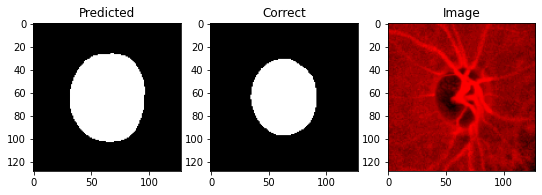

IOU: 0.7374969124794006
Dice: 0.8489188028068165
image #1


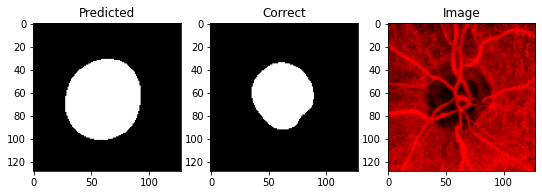

IOU: 0.6357162594795227
Dice: 0.7772940388479571
image #2


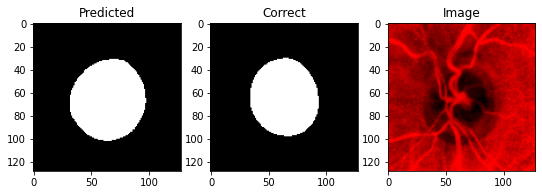

IOU: 0.8436303734779358
Dice: 0.9151838671411625
image #3


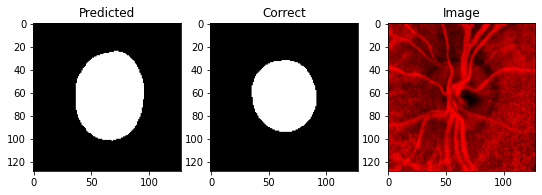

IOU: 0.7485635876655579
Dice: 0.8562040369269285
image #4


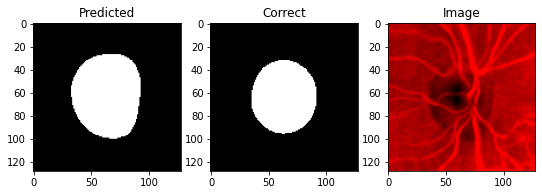

IOU: 0.7992125749588013
Dice: 0.888402625820569
image #5


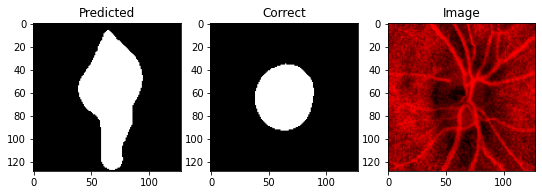

IOU: 0.5163463950157166
Dice: 0.6810401579986833
image #6


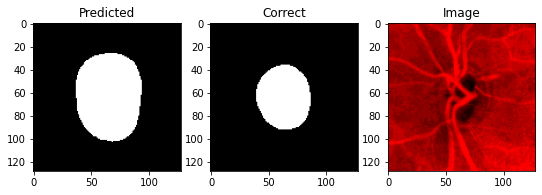

IOU: 0.5824728012084961
Dice: 0.7361552028218695
image #7


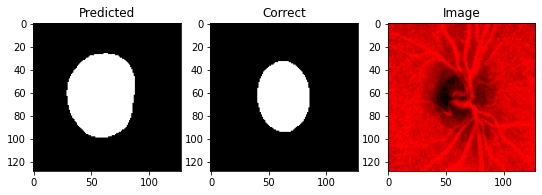

IOU: 0.6355956792831421
Dice: 0.7772039180765806
image #8


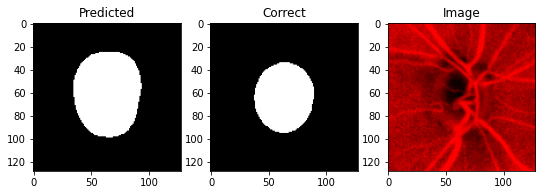

IOU: 0.6972529292106628
Dice: 0.82162522943434
image #9


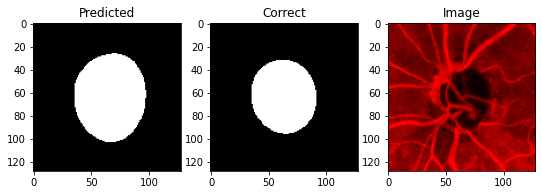

IOU: 0.7609508633613586
Dice: 0.864249962080995
image #10


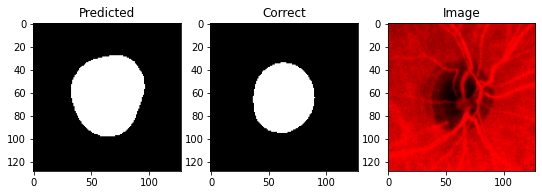

IOU: 0.7324347496032715
Dice: 0.8455553716272141
image #11


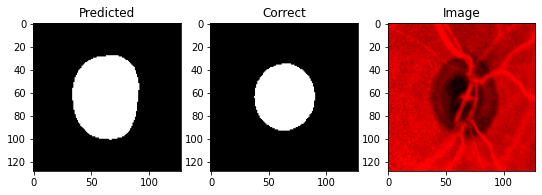

IOU: 0.6936568021774292
Dice: 0.8191232309285468
image #12


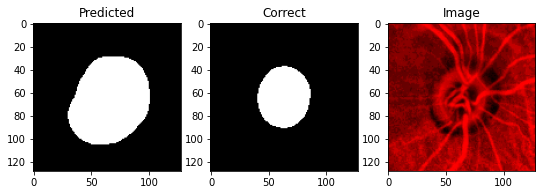

IOU: 0.4611137807369232
Dice: 0.6311812058485297
image #13


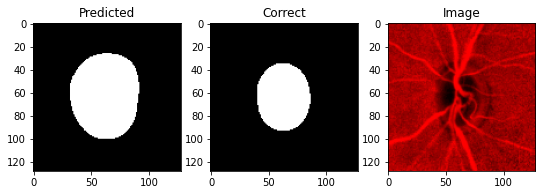

IOU: 0.6025104522705078
Dice: 0.7519582245430809
image #14


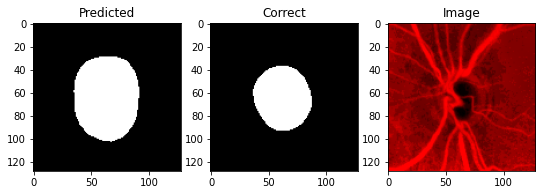

IOU: 0.6479576826095581
Dice: 0.786376604850214
image #15


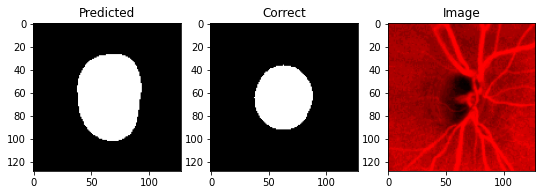

IOU: 0.6406799554824829
Dice: 0.780993211861379
image #16


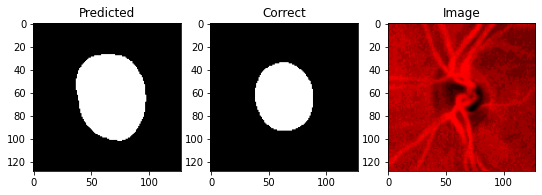

IOU: 0.6548476219177246
Dice: 0.7914295279544694
image #17


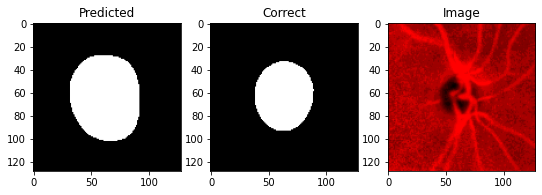

IOU: 0.6510430574417114
Dice: 0.7886445684279619
image #18


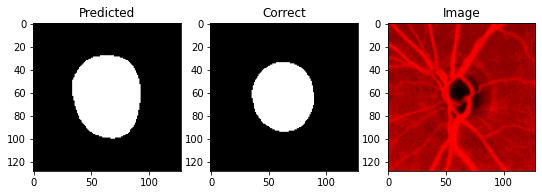

IOU: 0.7443763017654419
Dice: 0.8534583821805393
image #19


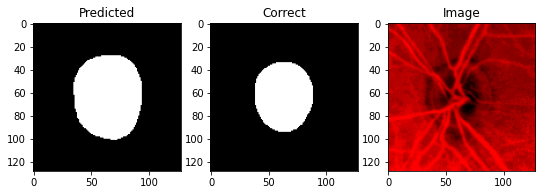

IOU: 0.687835156917572
Dice: 0.8150501672240803
image #20


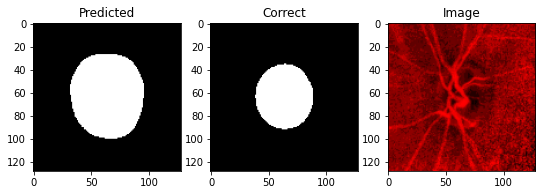

IOU: 0.5808746218681335
Dice: 0.7348775204132645
image #21


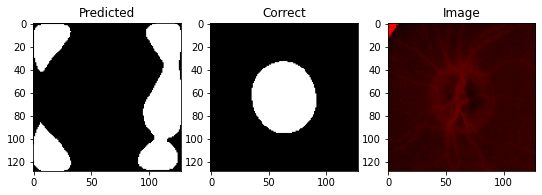

IOU: 0.0
Dice: 0.0
image #22


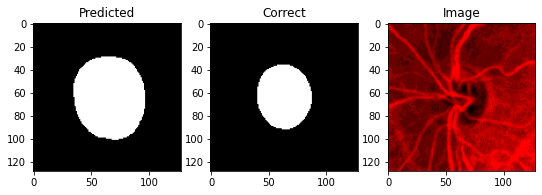

IOU: 0.5786407589912415
Dice: 0.7330873308733087
image #23


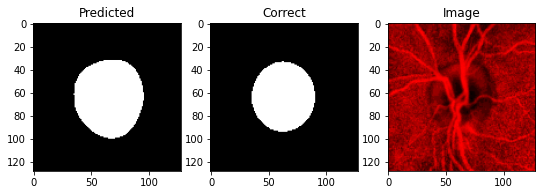

IOU: 0.8024767637252808
Dice: 0.8904156647200275
image #24


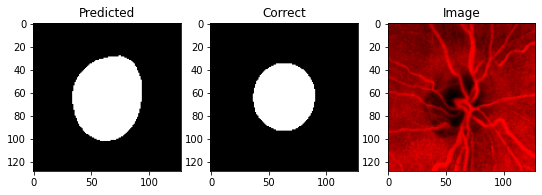

IOU: 0.7082500457763672
Dice: 0.8292112299465241
image #25


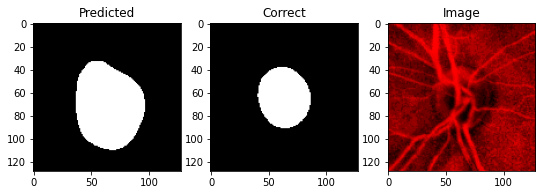

IOU: 0.5292792916297913
Dice: 0.6921944035346097
image #26


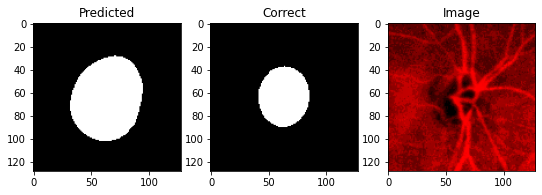

IOU: 0.5053132176399231
Dice: 0.6713728404235556
image #27


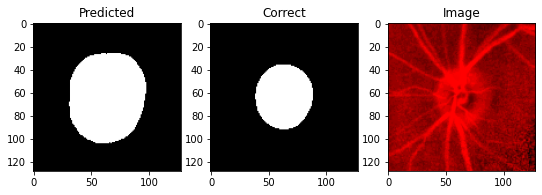

IOU: 0.5165765285491943
Dice: 0.6812403100775194
image #28


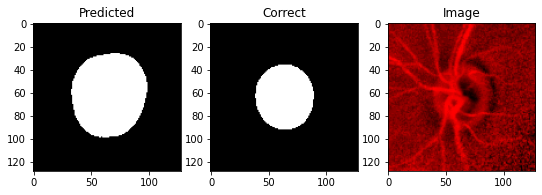

IOU: 0.5899921655654907
Dice: 0.7421321469764376
image #29


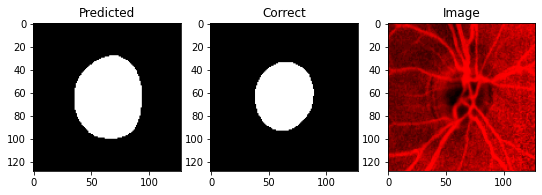

IOU: 0.701629638671875
Dice: 0.8246561030820129
image #30


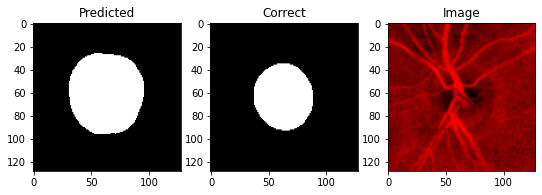

IOU: 0.6312516927719116
Dice: 0.773947630096122
image #31


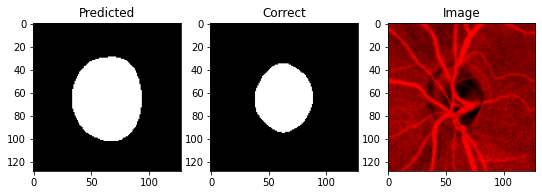

IOU: 0.6433823704719543
Dice: 0.7829977628635347
image #32


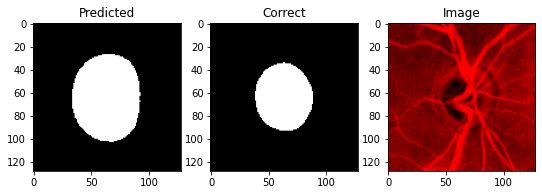

IOU: 0.6367663145065308
Dice: 0.7780784844384303
image #33


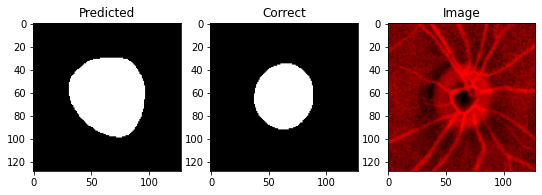

IOU: 0.6428571343421936
Dice: 0.782608695652174
image #34


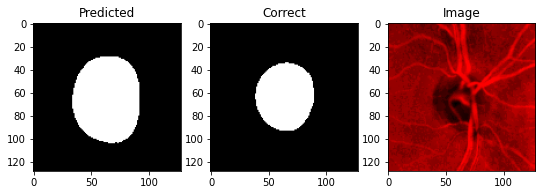

IOU: 0.6592053771018982
Dice: 0.7946037099494098
image #35


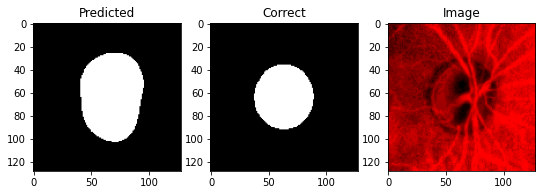

IOU: 0.6355735659599304
Dice: 0.7771873893021608
image #36


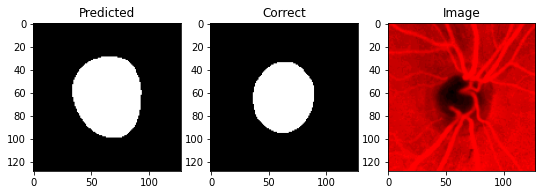

IOU: 0.7597014904022217
Dice: 0.8634435962680237
image #37


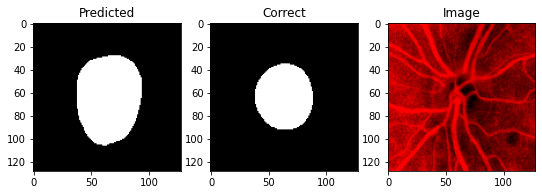

IOU: 0.642090380191803
Dice: 0.7820402546017546
image #38


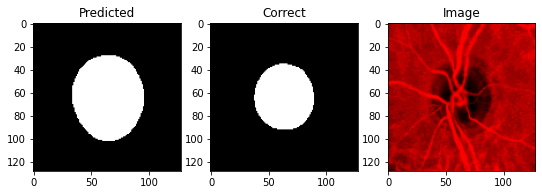

IOU: 0.6457757949829102
Dice: 0.7847676564334843
image #39


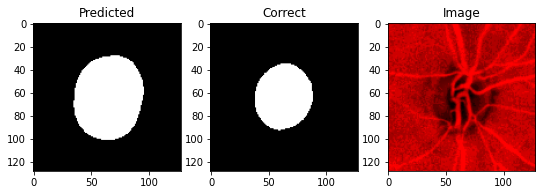

IOU: 0.6325028538703918
Dice: 0.774887270204648
image #40


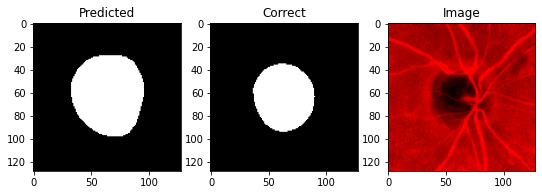

IOU: 0.6848194003105164
Dice: 0.8129291575950427
image #41


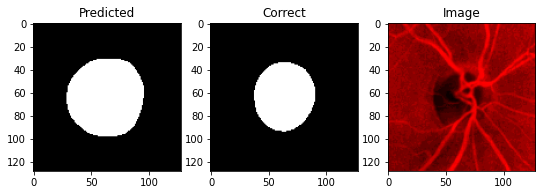

IOU: 0.6823561787605286
Dice: 0.8111910994764397
image #42


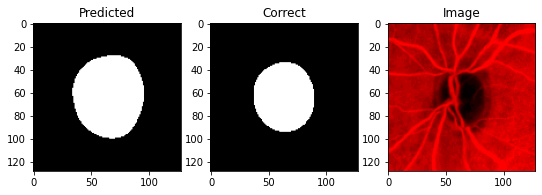

IOU: 0.7144075036048889
Dice: 0.8334162108403779
image #43


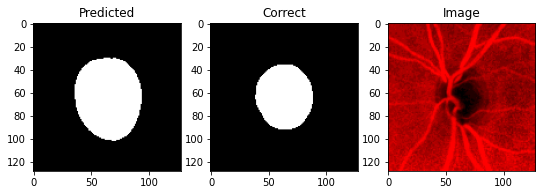

IOU: 0.6676764488220215
Dice: 0.8007266121707539
image #44


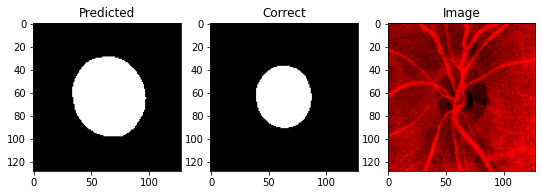

IOU: 0.5901734232902527
Dice: 0.7422755361686659
image #45


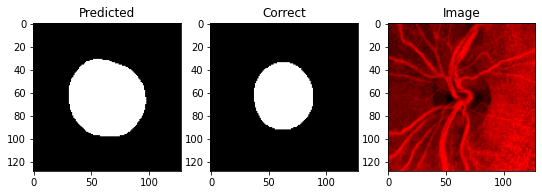

IOU: 0.6693935394287109
Dice: 0.8019601216627239
image #46


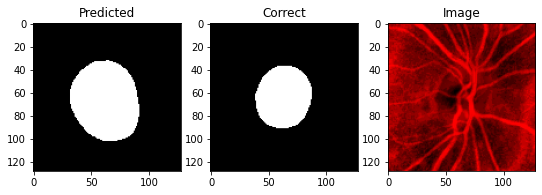

IOU: 0.6369174718856812
Dice: 0.7781912914030518
image #47


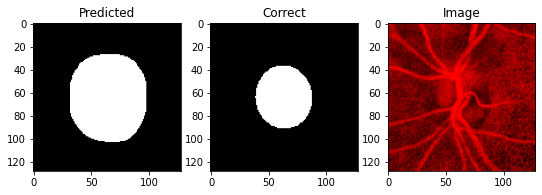

IOU: 0.49562543630599976
Dice: 0.6627667984189723
image #48


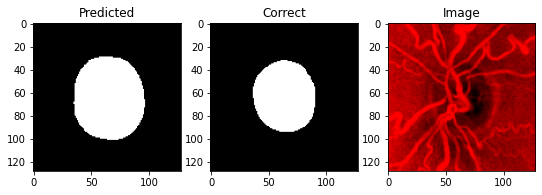

IOU: 0.7395284175872803
Dice: 0.8502631159304737
image #49


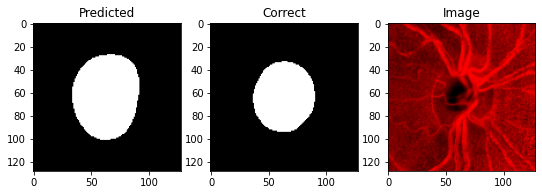

IOU: 0.7469387650489807
Dice: 0.8551401869158879
image #50


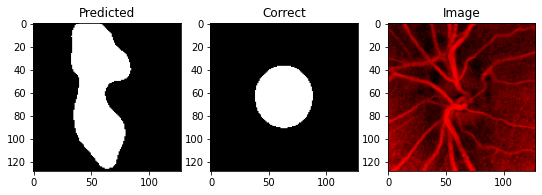

IOU: 0.2791575491428375
Dice: 0.436470953712333


In [13]:
pred_iou, pred_dice, pred_disc = predict(hue_channel_test, X_test, Z_test, model_disc, img_size)

In [14]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.6357417
0.7668456749324243


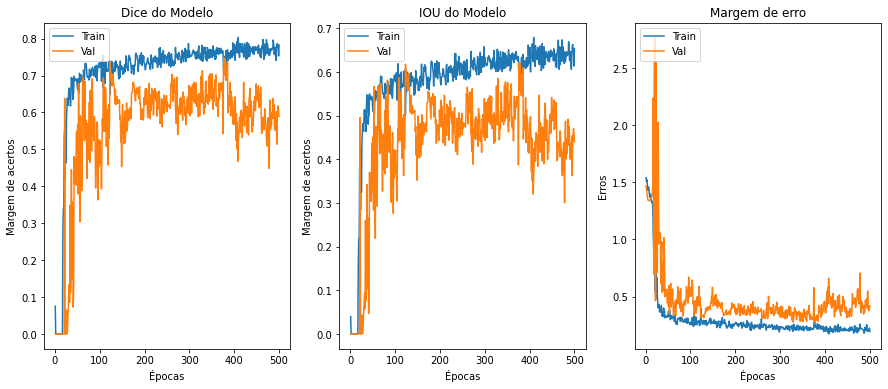

In [18]:
plot_results(history_cup, epochs)

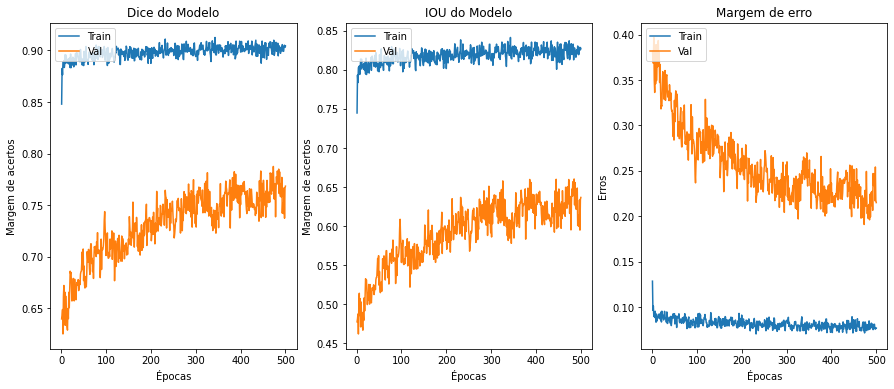

In [19]:
plot_results(history_disc, epochs)

In [21]:
result, diametros_cup, diametros_disc = create_table_result(pred_cup, pred_disc, test_idx)

image #0 - cdr = 0.8323542867135652
image #1 - cdr = 0.8620780237837402
image #2 - cdr = 0.8950799060034182
image #3 - cdr = 0.8082097910718232
image #4 - cdr = 0.8164825214646851
image #5 - cdr = 0.6452886188512328
image #6 - cdr = 0.825408241800482
image #7 - cdr = 0.8069433314035098
image #8 - cdr = 0.7845713067298331
image #9 - cdr = 0.808765393899613
image #10 - cdr = 0.8302607023333272
image #11 - cdr = 0.8595266734871801
image #12 - cdr = 0.879280731356256
image #13 - cdr = 0.7810431108003285
image #14 - cdr = 0.7945331923065655
image #15 - cdr = 0.7889150387749092
image #16 - cdr = 0.8023625721596904
image #17 - cdr = 0.7926150017620095
image #18 - cdr = 0.7569193815367402
image #19 - cdr = 0.8385470615581978
image #20 - cdr = 0.9195542715307542
image #21 - cdr = 0.3941532141607031
image #22 - cdr = 0.8803134067199487
image #23 - cdr = 0.880353822787559
image #24 - cdr = 0.8635895858776484
image #25 - cdr = 0.8518046727663813
image #26 - cdr = 0.802879234396814
image #27 - cdr 

In [22]:
pd.DataFrame(data= result)

cdr      area
0   0.832354  0.689475
1   0.862078  0.726102
2   0.895080  0.779817
3   0.808210  0.789243
4   0.816483  0.758999
5   0.645289  0.766957
6   0.825408  0.830031
7   0.806943  0.749490
8   0.784571  0.738035
9   0.808765  0.744391
10  0.830261  0.735589
11  0.859527  0.802689
12  0.879281  0.938310
13  0.781043  0.714644
14  0.794533  0.709374
15  0.788915  0.774487
16  0.802363  0.770851
17  0.792615  0.713628
18  0.756919  0.682442
19  0.838547  0.793678
20  0.919554  0.873551
21  0.394153  0.729345
22  0.880313  0.819972
23  0.880354  0.849845
24  0.863590  0.755923
25  0.851805  0.757883
26  0.802879  0.706935
27  0.810799  0.708206
28  0.872089  0.812680
29  0.802507  0.766815
30  0.860619  0.760746
31  0.828505  0.718043
32  0.849475  0.771318
33  0.890248  0.738751
34  0.790402  0.738668
35  0.827524  0.806138
36  0.776888  0.704124
37  0.782374  0.779944
38  0.791604  0.718388
39  0.796203  0.778313
40  0.775852  0.667325
41  0.832570  0.687311
42  0.774011  0.669793
43  0.751883  0.683429
44  0.856517  0.793064
45  0.878078  0.782511
46  0.883060  0.832775
47  0.850367  0.746512
48  0.843542  0.769764
49  0.742090  0.685623
50  0.568827  0.899167

In [23]:
cup = np.array(diametros_cup)
disc = np.array(diametros_disc)
pd.DataFrame(data={'cup - dm': cup[:,0], 'cup - dM': cup[:,1], 'disc - dm': disc[:,0], 'disc - dM': disc[:,1]})

cup - dm   cup - dM  disc - dm   disc - dM
0   55.068783  65.074570  65.680359   78.181335
1   54.808582  61.980701  64.813057   71.896858
2   56.695312  63.621674  64.853203   71.079323
3   59.022602  62.826645  59.913979   77.735565
4   56.304943  61.269871  60.913963   75.041252
5   55.865482  71.067574  49.591553  110.133003
6   58.713120  64.958260  58.375755   78.698341
7   55.089775  59.837189  59.314583   74.152901
8   55.914192  59.879715  59.290928   76.321571
9   57.569691  62.100128  62.366081   76.783859
10  55.308540  59.405663  62.670895   71.550613
11  54.956379  64.341072  58.571903   74.856400
12  69.847321  72.236160  65.116493   82.153694
13  55.645233  59.132034  60.649597   75.709053
14  51.811852  60.004799  57.712795   75.522079
15  55.322563  61.314983  56.318146   77.720642
16  57.949032  61.865704  59.947876   77.104424
17  55.563709  60.934715  61.435680   76.878075
18  53.923256  55.774509  59.509373   73.686195
19  57.277737  62.931072  60.449890   75.047752
20  61.367035  69.305145  64.348587   75.368195
21  46.771236  50.498421  33.099724  128.118759
22  58.544247  64.880150  62.486122   73.701195
23  58.444942  60.372692  60.471169   68.577759
24  52.641815  64.528687  60.015835   74.721474
25  53.796242  65.511215  59.906940   76.908730
26  53.669571  60.491608  60.748585   75.343346
27  58.935024  65.558197  67.292999   80.856285
28  61.359505  65.262520  65.248459   74.834740
29  56.860126  58.403038  59.368099   72.775749
30  58.637863  61.716644  65.964127   71.711952
31  53.326447  61.468777  60.917416   74.192436
32  54.701813  65.518913  59.987568   77.128754
33  53.459061  63.472221  64.541374   71.297234
34  55.750031  60.889088  59.457581   77.035576
35  53.978329  65.435616  55.171162   79.073975
36  53.793873  55.893841  59.692738   71.945824
37  56.896828  62.243710  57.214542   79.557472
38  56.685848  59.085159  62.050472   74.639824
39  59.118599  59.614536  60.257416   74.873543
40  54.109730  55.974873  63.174698   72.146355
41  55.348328  57.844173  66.950783   69.476616
42  54.105961  56.330601  61.937977   72.777512
43  52.988548  54.623940  58.173847   72.649551
44  58.709778  60.357788  62.768505   70.468842
45  57.978077  61.418858  64.856483   69.946922
46  55.714321  63.308369  58.657391   71.692070
47  60.694145  66.908775  68.654259   78.682259
48  56.966537  62.330070  62.320740   73.890884
49  53.734238  56.057384  58.210892   75.539833
50  64.872253  76.766678  48.357838  134.956085